{% include toc title="In This Lesson" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this tutorial, you will be able to:

* Be able to list atleast 3 sources of uncertainty / error associated with remote sensing data.
* Be able to interpret a scatter plot that compares remote sensing values with field measured values to determine how "well" the two metrics compare.
* Be able to describe 1-3 ways to better understand sources of error associated with a comparison between remote sensing values with field measured values.

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need

You will need a computer with internet access to complete this lesson and the data for week 5 of the course.

</div>

## Understanding uncertainty and error.

It is important to consider error and uncertainty when presenting scientific
results. Most measurements that we make - be they from instruments or humans -
have uncertainty associated with them. We will discuss what
that means, below.

## Uncertainty

**Uncertainty:** Uncertainty quantifies the range of values within which the
value of the measure falls within - within a specified level of confidence. The
uncertainty quantitatively indicates the "quality" of your measurement. It
answers the question: "how well does the result represent the value of the
quantity being measured?"

### Tree height measurement example

So for example let's pretend that we measured the height of a tree 10 times. Each
time our tree height measurement may be slightly different? Why? Because maybe
each time we visually determined the top of the tree to be in a slightly different
place. Or maybe there was wind that day during measurements that
caused the tree to shift as we measured it yielding a slightly different height each time. or... what other reasons can you think of that might impact tree height
measurements?

<figure>
   <a href="{{ site.url }}/images/course-materials/earth-analytics/week-5/measuring-tree-height.jpg">
   <img src="{{ site.url }}/images/course-materials/earth-analytics/week-5/measuring-tree-height.jpg" alt="national geographic scaling trees graphic"></a>
   <figcaption>When we measure tree height by hand, many different variables may impact the accuracy and precision of our results. Source:  http://www.haddenham.net/newsroom/guess-tree-height.html
   </figcaption>
</figure>

## What is the true value?

So you may be wondering, what is the true height of our tree?
In the cause of a tree in a forest, it's very difficult to determine the
true height. So we accept that there will be some variation in our measurements
and we measure the tree over and over again until we understand the range of
heights that we are likely to get when we measure the tree.

# Is there a way to set the working directory when this builds - that way we can comment this out and in the nbconvert script it forces the working directory - this works best....
## Rasterstats needs to be loaded also geocoder and contextily - what do those do?
# i think we need to be consistent in how we import things. sometimes we are importing parts of a library separately - why? 

In [1]:
import os
# be sure to set your working directory
os.chdir("/Users/lewa8222/Documents/earth-analytics")


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# why not just import glob?
from glob import glob

import numpy as np
import geopandas as gpd
# why import parts of raster io sepearately? 
import rasterio as rio
from rasterio import plot as riop
import rasterstats as rs

import geocoder
import contextily as ctx
from shapely.geometry import Point
plt.ion()

# to install rasterstats & geocoder contextily use pip


## Why do we create a df here  (which i thnjk is better) vs previously we used a numpy array to create a list of xy locations. 
## seeems beter to just use pandas if we plan to use geopandas.
# below why is _ used -- this is different from how we set the axis title etc previously

heights    10.063636
dtype: float64
heights    0.412971
dtype: float64


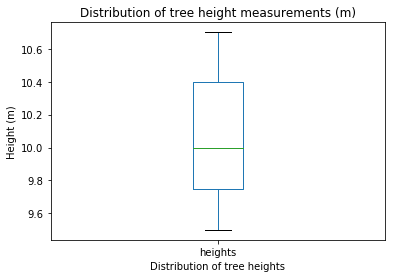

In [14]:
tree_heights = pd.DataFrame([10, 10.1, 9.9, 9.5, 9.7, 9.8, 9.6, 10.5, 10.7, 10.3, 10.6], columns=['heights'])

# What is the average tree height
print(tree_heights.mean(0))

# What is the standard deviation of measurements?
print(tree_heights.std())

# Make a boxplot to visualize
ax = tree_heights.plot.box()
_ = ax.set(title="Distribution of tree height measurements (m)", ylabel="Height (m)",
          xlabel="Distribution of tree heights")



In the example above, our mean tree height value is towards the center of
our distribution of measured heights. We might expect that the sample mean of
our observations provides a reasonable estimate of the true value. The
variation among our measured values may also provide some information about the
precision (or lack thereof) of the measurement process.

<a href="http://www.physics.csbsju.edu/stats/box2.html" target="_blank">Read more about  the basics of a box plot</a>

# how do remove the legend here and customize colors, etc

[<matplotlib.text.Text at 0x12666deb8>, <matplotlib.text.Text at 0x126717828>]

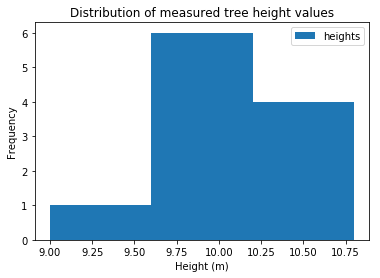

In [15]:
ax = tree_heights.plot.hist(bins=[9, 9.6, 10.2, 10.8])
ax.set(title="Distribution of measured tree height values", xlabel="Height (m)")


## Measurement accuracy

Measurement **accuracy** is a concept that relates to whether there is bias in
measurements, i.e. whether the expected value of our observations is close to
the true value. For low accuracy measurements, we may collect many observations,
and the mean of those observations may not provide a good measure of the truth
(e.g., the height of the tree). For high accuracy measurements, the mean of
many observations would provide a good measure of the true value. This is
different from **precision**, which typically refers to the variation among
observations. Accuracy and precision are not always tightly coupled. It is
possible to have measurements that are very precise but inaccurate, very
imprecise but accurate, etc.

## Systematic vs Random error

**Systematic error:** a systematic error is one that tends to shift all measurements
in a systematic way. This means that the mean value of a set of measurements is
consistently displaced or varied in a predictable way, leading to inaccurate observations.
Causes of systematic errors may be known or unknown but should always be corrected for when present.
For instance, no instrument can ever be calibrated perfectly, so when a group of measurements systematically differ from the value of a standard reference specimen, an adjustment in the values should be made.
Systematic error can be corrected for only when the "true value" (such as the value assigned to a calibration or reference specimen) is known.

*Example:* Remote sensing instruments need to be calibrated. For example a laser in
a lidar system may be tested in a lab to ensure that the distribution of output light energy
is consistent every time the laser "fires".

**Random error:** is a component of the total error which, in the course of a number of measurements, varies in an unpredictable way. It is not possible to correct for random error.  Random errors can occur for a variety of reasons such as:

* Lack of equipment sensitivity. An instrument may not be able to respond to or indicate a change in some quantity that is too small or the observer may not be able to discern the change.
* Noise in the measurement.  Noise is extraneous disturbances that are unpredictable or random and cannot be completely accounted for.
* Imprecise definition. It is difficult to exactly define the dimensions of a object.  For example, it is difficult to determine the ends of a crack with measuring its length.  Two people may likely pick two different starting and ending points.

*Example:* random error may be introduced when we measure tree heights as discussed above.

- <a href="https://www.nde-ed.org/GeneralResources/ErrorAnalysis/UncertaintyTerms.htm">Source: nde-ed.org</a>


<figure>
   <a href="{{ site.url }}/images/course-materials/earth-analytics/week-5/accuracy_precision.png">
   <img src="{{ site.url }}/images/course-materials/earth-analytics/week-5/accuracy_precision.png" alt="national geographic scaling trees graphic"></a>
   <figcaption>Accuracy vs precision. Accuracy quantifies how close a measured value is to the true value. Precision quantifies how close two or more measurements agree with each other (how quantitatively repeatable are the results) Source: http://www.ece.rochester.edu/courses/ECE111/error_uncertainty.pdf
   </figcaption>
</figure>

## Using lidar to estimate tree height

We use lidar data to estimate tree height because it is an efficient way to measure
large areas of trees (forests) quantitatively. However, we can process the lidar
data in many different ways to estimate height. Which method most closely represents
the actual heights of the trees on the ground?

<figure>
   <a href="{{ site.url }}/images/course-materials/earth-analytics/week-3/scaling-trees-nat-geo.jpg">
   <img src="{{ site.url }}/images/course-materials/earth-analytics/week-3/scaling-trees-nat-geo.jpg" alt="national geographic scaling trees graphic"></a>
   <figcaption>It can be difficult to measure the true height of trees! Often times "seeing" the very top of the tree where it is tallest is not possible from the ground - especially in dense, tall forests. One can imagine the amount of uncertainty that is thus introduced when we try to estimate the true height of trees! Image Source:
   National Geographic
   </figcaption>
</figure>

<figure>
   <a href="{{ site.url }}/images/course-materials/earth-analytics/week-3/waveform.png" target="_blank">
   <img src="{{ site.url }}/images/course-materials/earth-analytics/week-3/waveform.png" alt="Example of a lidar waveform"></a>
   <figcaption>An example LiDAR waveform. Source: NEON, Boulder, CO.
   </figcaption>
</figure>


<figure>
   <a href="{{ site.url }}/images/course-materials/earth-analytics/week-3/Treeline_ScannedPoints.png">
   <img src="{{ site.url }}/images/course-materials/earth-analytics/week-3/Treeline_ScannedPoints.png" alt="example of a tree profile after a lidar scan."></a>
   <figcaption>Cross section showing LiDAR point cloud data (above) and the
   corresponding landscape profile (below). Graphic: Leah A. Wasser
   </figcaption>
</figure>

In [16]:
# not sure what this is doing -- it looks like it's trying to find all the shapefiles or something but i'm not sure why that is necessary
#folders = glob('/data/week5/california/*')
#files = glob(folders[0] + '/*.shp') + glob(folders[1] + '/*/*.shp') + glob(folders[1] + '/*/*/*')
#files

First, we can import the plot locations. Note that it imports as a geopandas geodataframe

In [3]:
# first buffer the plot points
# load sjer plot locations - shapefile format using geopandas
SJER_plots = gpd.read_file('data/week5/california/SJER/vector_data/SJER_plot_centroids.shp')
type(SJER_plots)

geopandas.geodataframe.GeoDataFrame

## Data structure
We can use `SJER_plots.geom_type.head()` to determine the vector type of the shapefile that we imported. Below, we see that the data are stored as points. These points represent the centroid (or hte center) of the plot where trees were measured. We want to extract tree height values derived from the lidar data for the entire plot. To do this, we will need to create a BUFFER around the points.


In [4]:
SJER_plots.geom_type.head()

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In this case our plot size is 40m. If we create a circular buffer wiht a 20m diameter it will closely approximate where trees were measured on the ground. 

We can use the .buffer() function to create the buffer. Here the buffer size is specified in the () of the function. We will send the new object to a new shapefile using .to_file() as follows:

`SJER_plots.buffer(20).to_file('path-to-shapefile-here.shp')`

# Below the attributes are not transfered - not sure how to force them to transfer 

In [5]:
# Create a 20m diameter 20m diameter circular buffer arond each point 
# then export the buffered layer as a polygon shapefile using to_file

#SJER_plots.buffer(20).to_file(plot_buffer_path)


In [14]:
# sneaky assign the buffer geometry to the points layer to maintain attributes
SJER_plots["geometry"] = SJER_plots.geometry.buffer(20)
SJER_plots["geometry"]
# export the layer as a shapefile to use in zonal stats
plot_buffer_path = 'plot_buffer.shp'
SJER_plots.to_file(plot_buffer_path)

## Extract pixel values for each plot 

Once we have the boundary for each plot location (a 20m diameter circle) we can extract all of the pixels that fall within each circle using the function `zonal_stats` in the `rasterstats` library. 

First, let's set all pixels that = 0 to nodata value or `NA`. We know that those pixels are not trees. 

In [15]:
# load lidar canopy height model raster  using rasterio
SJER_chm = rio.open('data/week5/california/SJER/2013/lidar/SJER_lidarCHM.tif')

# https://mapbox.github.io/rasterio/quickstart.html
SJER_chm_data = SJER_chm.read()
SJER_chm_data[SJER_chm_data==0] = np.nan
# access the mask for the data
# note it seems that if we just added another no data value this could work?
SJER_chm.read_masks()


SJER_chm.nodata
#SJER_chm[SJER_chm==0] = np.nan
SJER_chm.get_nodatavals()

(-9999.0,)

# The code below doesn't work - i'm trying to understand how to export a numpy array as a geotiff with the proper spatial attributes. 

In [16]:
# Write the product as a raster band to a new 8-bit file. For
# keyword arguments, we start with the meta attributes of the
# source file, but then change the band count to 1, set the
# dtype to uint8, and specify LZW compression.

# kwargs = SJER_chm_data.meta
# kwargs.update(
#        dtype=rasterio.uint8,
#        count=1,
#        compress='lzw')

# with rasterio.open('chm-nodata.tif', 'w', **kwargs) as dst:
#        dst.write_band(1, total.astype(rasterio.uint8))

We can use the `.zonal_stats()` function within the `rasterio` package to extract values for a set of shapefile boundaries.

# NOTE the plot id doesn't export here - i must have broken something but am not sure what.
# Also copy_properties should transfer attributes but it's not.

In [17]:
# note that teh buffer object doesn't have any spatial attributes
gpd.read_file(plot_buffer_path)

,Plot_ID,Point,easting,geometry,northing,plot_type
0,SJER1068,center,255852.376,"POLYGON ((255892.3519091241 4111568.799353486,...",4111567.818,trees
1,SJER112,center,257406.967,"POLYGON ((257446.9429091241 4111299.952353486,...",4111298.971,trees
2,SJER116,center,256838.760,"POLYGON ((256878.7359091241 4110820.857353487,...",4110819.876,grass
3,SJER117,center,256176.947,"POLYGON ((256216.9229091241 4108753.007353486,...",4108752.026,trees
4,SJER120,center,255968.372,"POLYGON ((256008.3479091241 4110477.060353486,...",4110476.079,grass
5,SJER128,center,257078.867,"POLYGON ((257118.8429091241 4111389.551353486,...",4111388.570,trees
6,SJER192,center,256683.434,"POLYGON ((256723.4099091241 4111072.068353486,...",4111071.087,grass
7,SJER272,center,256717.467,"POLYGON ((256757.4429091241 4112168.759353486,...",4112167.778,trees
8,SJER2796,center,256034.390,"POLYGON ((256074.3659091241 4111534.860353487,...",4111533.879,soil
9,SJER3239,center,258497.102,"POLYGON ((258537.0779091241 4109857.964353486,...",4109856.983,soil


In [18]:
# import new geotiff with 0's removed

# Extract zonal stats
lidar_tif_path = 'data/week5/california/SJER/2013/lidar/SJER_lidarCHM.tif'
sjer_tree_heights = rs.zonal_stats(plot_buffer_path, 
            lidar_tif_path, 
            geojson_out=True,
            copy_properties=True,
            stats="count min mean max median")
sjer_tree_heights

/Users/lewa8222/anaconda/lib/python3.6/site-packages/rasterstats/main.py:142: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  with Raster(raster, affine, nodata, band) as rast:
/Users/lewa8222/anaconda/lib/python3.6/site-packages/rasterstats/io.py:242: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  self.affine = guard_transform(self.src.transform)


[{'geometry': {'coordinates': [[(255892.3519091241, 4111568.7993534864),
     (255892.3519091241, 4111566.8366465135),
     (255892.25560365754, 4111564.876303707),
     (255892.06322473267, 4111562.9230477037),
     (255891.7752358073, 4111560.9815840703),
     (255891.39233067192, 4111559.0565899615),
     (255890.9154317785, 4111557.152702857),
     (255890.34568801837, 4111555.2745093876),
     (255889.68447195395, 4111553.4265342853),
     (255888.93337651287, 4111551.6132294848),
     (255888.0942111496, 4111549.8389633955),
     (255887.16899748764, 4111548.1080103805),
     (255886.1599644467, 4111546.4245404564),
     (255885.06954287502, 4111544.792609249),
     (255883.9003596962, 4111543.216148226),
     (255882.65523157455, 4111541.69895522),
     (255881.33715813103, 4111540.2446852797),
     (255879.9493147212, 4111538.8568418697),
     (255878.49504478075, 4111537.538768426),
     (255876.97785177312, 4111536.293640303),
     (255875.40139075022, 4111535.124457124),
   

In [19]:
# turn extracted data into a pandas geo data frame 
SJER_lidar_height_df = gpd.GeoDataFrame.from_features(sjer_tree_heights)
SJER_lidar_height_df.head()

,Plot_ID,Point,count,easting,geometry,max,mean,median,min,northing,plot_type
0,SJER1068,center,5021,255852.376,"POLYGON ((255892.3519091241 4111568.799353486,...",24.150000,2.726264,0.0,0.0,4111567.818,trees
1,SJER112,center,5024,257406.967,"POLYGON ((257446.9429091241 4111299.952353486,...",24.559999,4.145330,0.0,0.0,4111298.971,trees
2,SJER116,center,5023,256838.760,"POLYGON ((256878.7359091241 4110820.857353487,...",16.070000,2.659942,0.0,0.0,4110819.876,grass
3,SJER117,center,5026,256176.947,"POLYGON ((256216.9229091241 4108753.007353486,...",21.760000,2.114230,0.0,0.0,4108752.026,trees
4,SJER120,center,5020,255968.372,"POLYGON ((256008.3479091241 4110477.060353486,...",8.420000,0.400490,0.0,0.0,4110476.079,grass


In [60]:
# view docstring for object
#data?
#SJER_chm.

# ignore hte code below - it's the old code whic actually worked but i made some changes

# not sure what the .transform component does 
#stats = rs.zonal_stats(SJER_plots, 
#                       lidar_tif_path, 
#                       geojson_out=True,
#                       tranform=SJER_chm.transform)
#http://pythonhosted.org/rasterstats/
# Warning : https://github.com/mapbox/rasterio/issues/86
FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  self.affine = guard_transform(self.src.transform)

## here we are reading things in using the path vs typing in the path directlry. i'm open to either but we should be consistent throughout.

In [20]:
# import in situ data
path_insitu = 'data/week5/california/SJER/2013/insitu/veg_structure/D17_2013_SJER_vegStr.csv'
SJER_insitu = pd.read_csv(path_insitu)
# what is the structure of the data
type(SJER_insitu)
# view the first 5 rows of data
SJER_insitu.head()



,siteid,sitename,plotid,easting,northing,taxonid,scientificname,indvidual_id,pointid,individualdistance,...,canopyform,livingcanopy,inplotcanopy,materialsampleid,dbhqf,stemmapqf,plant_group,common_name,aop_plot,unique_id
0,SJER,San Joaquin,SJER128,257085.7,4111381.5,PISA2,Pinus sabiniana,1485,center,9.7,...,NaN,100,100,NaN,0,0,NaN,NaN,NaN,NaN
1,SJER,San Joaquin,SJER2796,256047.7,4111548.5,ARVI4,Arctostaphylos viscida,1622,NE,5.8,...,Hemisphere,70,100,f095,0,0,NaN,NaN,NaN,NaN
2,SJER,San Joaquin,SJER272,256722.9,4112170.2,ARVI4,Arctostaphylos viscida,1427,center,6.0,...,Hemisphere,35,100,NaN,0,0,NaN,NaN,NaN,NaN
3,SJER,San Joaquin,SJER112,257421.4,4111308.2,ARVI4,Arctostaphylos viscida,1511,center,17.2,...,Sphere,70,100,f035,0,0,NaN,NaN,NaN,NaN
4,SJER,San Joaquin,SJER272,256720.5,4112177.2,ARVI4,Arctostaphylos viscida,1431,center,9.9,...,Sphere,80,100,f087,0,0,NaN,NaN,NaN,NaN


We want to calculate a summary value of max tree height (the tallest tree measured) in each plot. 
We have a unique id for each plot - **plotid** that we can use to group the data. The tree height values themselves are located in the **stemheight** column.

We can calculate this by using the .groupy() method in pandas. Note that the statement below 

## what is reset_index??

In [21]:
## extract max tree height for each plot
insitu_stem_height = SJER_insitu.groupby('plotid').max()['stemheight'].reset_index()
# view the top 
insitu_stem_height

,plotid,stemheight
0,SJER1068,19.3
1,SJER112,23.9
2,SJER116,16.0
3,SJER117,11.0
4,SJER120,8.8
5,SJER128,18.2
6,SJER192,13.7
7,SJER272,12.4
8,SJER2796,9.4
9,SJER3239,17.9


Note that now we have the maximum tree height value for each field plot where 
we measured trees. Next we can join the 
measured tree height data that we summarized above with the maximum tree 
height data that we extracted from our lidar canopy height model raster.

## Is there a good way to enforce line widths -- it may be nice if we can work in py scripts and go back and forth to notebooks...
## im also not sure that we set all raster cell values that == 0 to NA??
# SJER_chm[SJER_chm==0] <- NA

it would be good to be abel to rename columns so the lidar columns say lidar vs measured - consider doing that above


In [22]:
# join data
# note the code below doesn't work because the attributes didn't transfer when i created the buffer object
SJER_final_height = pd.merge(insitu_stem_height, 
                       SJER_lidar_height_df, 
                       left_on='plotid', 
                       right_on='Plot_ID')
SJER_final_height


,plotid,stemheight,Plot_ID,Point,count,easting,geometry,max,mean,median,min,northing,plot_type
0,SJER1068,19.3,SJER1068,center,5021,255852.376,"POLYGON ((255892.3519091241 4111568.799353486,...",24.150000,2.726264,0.000,0.0,4111567.818,trees
1,SJER112,23.9,SJER112,center,5024,257406.967,"POLYGON ((257446.9429091241 4111299.952353486,...",24.559999,4.145330,0.000,0.0,4111298.971,trees
2,SJER116,16.0,SJER116,center,5023,256838.760,"POLYGON ((256878.7359091241 4110820.857353487,...",16.070000,2.659942,0.000,0.0,4110819.876,grass
3,SJER117,11.0,SJER117,center,5026,256176.947,"POLYGON ((256216.9229091241 4108753.007353486,...",21.760000,2.114230,0.000,0.0,4108752.026,trees
4,SJER120,8.8,SJER120,center,5020,255968.372,"POLYGON ((256008.3479091241 4110477.060353486,...",8.420000,0.400490,0.000,0.0,4110476.079,grass
5,SJER128,18.2,SJER128,center,5020,257078.867,"POLYGON ((257118.8429091241 4111389.551353486,...",21.629999,2.532036,0.000,0.0,4111388.570,trees
6,SJER192,13.7,SJER192,center,5022,256683.434,"POLYGON ((256723.4099091241 4111072.068353486,...",20.020000,3.554761,0.000,0.0,4111071.087,grass
7,SJER272,12.4,SJER272,center,5015,256717.467,"POLYGON ((256757.4429091241 4112168.759353486,...",21.080000,3.417619,0.000,0.0,4112167.778,trees
8,SJER2796,9.4,SJER2796,center,5024,256034.390,"POLYGON ((256074.3659091241 4111534.860353487,...",25.949999,5.121427,2.595,0.0,4111533.879,soil
9,SJER3239,17.9,SJER3239,center,5026,258497.102,"POLYGON ((258537.0779091241 4109857.964353486,...",18.449999,2.844196,0.000,0.0,4109856.983,soil




## Study site location



To answer the question above, let's look at some data from a study site location

in California - the San Joaquin Experimental range field site. You can see the field

site location on the map below.




In [23]:
# Pull the california lat / long pair, then fetch a box around it
cali = geocoder.google('california')
zoom = 6
# _ = ctx.howmany(cali.west, cali.south, cali.east, cali.north, zoom, ll=True)  # Tel tell how big the download is
_ = ctx.bounds2raster(cali.west, cali.south, cali.east, cali.north, 6, './cali.tif', ll=True, url=ctx.sources.ST_TERRAIN)
calir = rio.open('./cali.tif')

# Fetch the state boundaries
state_boundary_us = gpd.read_file(
    "/data/week5/usa-boundary-layers/US-State-Boundaries-Census-2014.shp")

# Generate our LatLng for the station we care about
SJER_chm_point = Point(SJER_chm.bounds[0], SJER_chm.bounds[1])
SJER_chm_df = pd.DataFrame([SJER_chm_point], columns=['geometry'])
SJER_chm_gpd = gpd.GeoDataFrame(SJER_chm_df, crs=SJER_chm.crs)

# Project into the same CRS
state_boundary_us_chm = state_boundary_us.to_crs(calir.crs)
SJER_chm_gpd = SJER_chm_gpd.to_crs(calir.crs)


# Make the figure
fig, ax = plt.subplots(figsize=(10, 10))

# Load the tile raster (note the re-arrangement of the bounds)
bb = calir.bounds
riop.show(calir, ax=ax)
# ax.imshow(img, extent=(bb.left, bb.right, bb.bottom, bb.top))
state_boundary_us_chm.plot(ax=ax, alpha=.3)
SJER_chm_gpd.plot(ax=ax, markersize=50, color='r')

# ```{r ggmap, echo=F, warning=F, message=F, results = "hide"}

# library(ggmap)

# cali_map <- get_map(location = "California",

#           source="google",

#           maptype="terrain", crop=FALSE,

#           zoom=6)



# # creating a sample data.frame with your lat/lon points

# lon <- c(SJER_chm@extent@xmin)

# lat <- c(SJER_chm@extent@ymin)



# # import us data

# state_boundary_us <- readOGR("data/week5/usa-boundary-layers",

#           "US-State-Boundaries-Census-2014")

# df <- as.data.frame(cbind(lon,lat))

# site_location <- SpatialPoints(df, proj4string = crs(SJER_chm))

# site_location_wgs84 <- spTransform(site_location, CRSobj = crs(state_boundary_us))



# site_locat_points <- as.data.frame(coordinates(site_location_wgs84))

# ```





# ```{r ggmap-plot, echo=F, warning=F, message=F, results = "hide", fig.cap="ggmap of study area."}

# # create a map with a point location for boulder.

# ggmap(cali_map) + labs(x = "", y = "") +

#   geom_point(data = site_locat_points, aes(x = lon, y = lat, fill = "red", alpha = 0.2), size = 5, shape = 19) +

#   guides(fill=FALSE, alpha=FALSE, size=FALSE)



# ```


OSError: no such file or directory: '/data/week5/usa-boundary-layers/US-State-Boundaries-Census-2014.shp'



## Study area plots



At this study site, we have both lidar data - specifically a canopy height model

that was processed by NEON (National Ecological Observatory Network). We also

have some "ground truth" data. That is we have measured tree height values collected at a set

of field site plots by technicians at NEON. We will call these measured values

*in situ* measurements.



A map of our study plots is below overlaid on top of the canopy height mode.




## The chunk below uses .read() rather than rio.open -- we really need to be consistent in how we open and work with data...

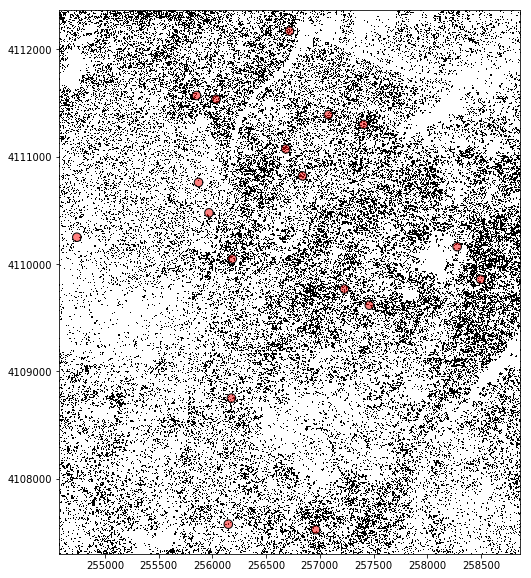

In [24]:
img = SJER_chm.read().squeeze()
img[img == 0] = np.nan

fig, ax = plt.subplots(figsize=(10, 10))
# riop.show(SJER_chm, cmap='Greys', ax=ax)
ax.imshow(img, cmap='Greys', extent=[SJER_chm.bounds[ii] for ii in [0, 2, 1, 3]])
SJER_plots.plot(ax=ax, markersize=500, color='r')


# ```{r plot-plots, fig.cap="plots", echo=F}

# # Overlay the centroid points and the stem locations on the CHM plot

# plot(SJER_chm,

#      main="Study area plot locations",

#      col=gray.colors(100, start=.3, end=.9),

#      legend=F,

#      box=F, # turn off black border

#      axes=F) # turn off axis labels and ticks



# # pch 0 = square

# plot(SJER_plots,

#      pch = 15,

#      cex = 2,

#      col = "magenta",

#      add=TRUE)

# par(xpd=T)

# legend(SJER_chm@extent@xmax+100, SJER_chm@extent@ymax,

#        legend="Plot \nlocations",

#        pch = 15,

#        col = "magenta",

#        bty="n")



# ```




### Compare lidar derived height to in situ measurements



We can compare maximum tree height values at each plot to the maximum pixel value

in our CHM for each plot. To do this, we define the geographic boundary of our plot

using a polygon - in the case below we use a circle as the boundary. We then extract

the raster cell values for each circle and calculate the max value for all of the

pixels that fall within the plot area.



Then, we calculate the max height of our measured plot tree height data.



Finally we compare the two using a scatter plot to see how closely the data relate.

Do they follow a 1:1 line? Do the data diverge from a 1:1 relationship?



<figure>

    <img src="{{ site.url }}/images/course-materials/earth-analytics/week-5/buffer-circular.png" alt="buffer circular">

    <figcaption>The extract function in R allows you to specify a circular buffer

    radius around an x,y point location. Values for all pixels in the specified

    raster that fall within the circular buffer are extracted. In this case, we

    will tell R to extract the maximum value of all pixels using the fun=max

    command. Source: Colin Williams, NEON

    </figcaption>

</figure>




In [26]:
SJER_final_height.columns

Index(['plotid', 'stemheight', 'Plot_ID', 'Point', 'count', 'easting',
       'geometry', 'max', 'mean', 'median', 'min', 'northing', 'plot_type'],
      dtype='object')

NameError: name 'SJER_li' is not defined

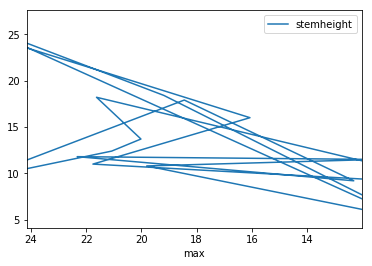

In [29]:
# this plot should be a scatter plot with labels and such
SJER_final_height.plot('max', 'stemheight')

In [ ]:
# ```{r plot-data, fig.cap="final plot", echo=F, warning=F, message=F}



# # create plot

# p <-ggplot(SJER_height@data, aes(x = insitu_max, y=SJER_lidarCHM)) +

#   geom_point() +

#   theme_bw() +

#   xlab("Mean measured height (m)") +

#   ylab("Mean LiDAR pixel (m)") +

#   ggtitle("Lidar Derived Max Tree Height \nvs. InSitu Measured Max Tree Height") +

#   geom_abline(intercept = 0, slope=1) +

#   geom_smooth(method=lm)



# p



# ```




### How different are the data?




In [ ]:
```{r view-diff, echo=F, fig.cap="box plot showing differences between chm and measured heights."}

# Calculate difference

SJER_height@data$ht_diff <-  (SJER_height@data$SJER_lidarCHM - SJER_height@data$insitu_max)

SJER_height@data$Plot_ID <- gsub("SJER", "", SJER_height@data$Plot_ID)

# create bar plot using ggplot()

ggplot(data=SJER_height@data,

       aes(x=Plot_ID, y=ht_diff, fill=Plot_ID)) +

       geom_bar(stat="identity") +

       xlab("Plot Name") + ylab("Height difference (m)") +

       ggtitle("Difference: \nLidar Max height - in situ Max height (m)")



```




## View interactive scatterplot



<a href="https://plot.ly/~leahawasser/170/" target="_blank">View scatterplot plotly</a>





## View interactive difference barplot



<a href="https://plot.ly/~leahawasser/158/chm-minus-insitu-differences/

" target="_blank">View scatterplot differences</a>




In [1]:
```{r ggplotly, echo=F, eval=F}

library(plotly)



Sys.setenv("plotly_username"="leahawasser")

Sys.setenv("plotly_api_key"="#")



plotly_POST(p)



```
